In [44]:
# Read dictionary from file 
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import constants



In [45]:
df=open("rmtemp_data","rb")
data=pickle.load(df)

In [6]:
def mag_calib(x):
    return (-0.0000008*x**3)+(0.0000334*x**2)+(0.0027064*x)+0.0000248
def linear(x,m,c):
    return (m*x) +c


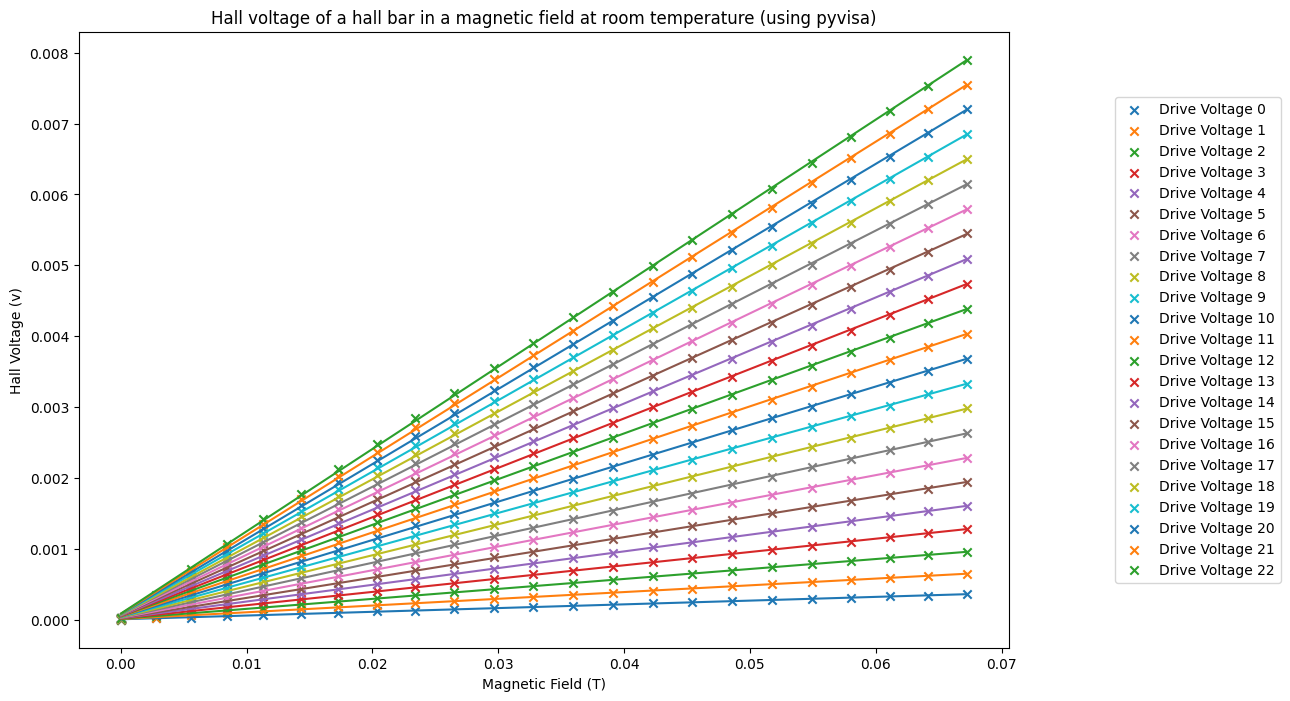

In [30]:
mag=np.arange(0,23,1)

# Initialise empty array to read in from dictionary 
hall_list=[]
current_list=[]
supply_list=data["0"]["Power Supply Voltage"]


# Insert values of Hall Bar Voltage and current for each magnetic field voltage into an array 
for i in np.arange(0,23,1):
    x=str(i)
    hall_list.append(data[x]["Hall Bar Voltage"])
    current_list.append(data[x]["Hall Bar Current"])



B= mag_calib(mag)

params=[]
cov=[]
gradients=[]

# Find paramaters of best fit lines for each new data set
for i in range(len(mag)):
    p,c = optimize.curve_fit(linear, B, hall_list[:][i], p0=[1, 0])
    params.append(p)
    cov.append(c)
    gradients.append(p[0])


# Plot the graph
plt.figure(figsize=(12,8))

for i in range(len(mag)):
    
    plt.scatter(B,hall_list[:][i],marker="x",label="Drive Voltage {0}".format(supply_list[i]))
    plt.plot(B,linear(B,*params[i]))


plt.ylabel("Hall Voltage (v)")
plt.xlabel("Magnetic Field (T)")
plt.title("Hall voltage of a hall bar in a magnetic field at room temperature (using pyvisa)")
plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))


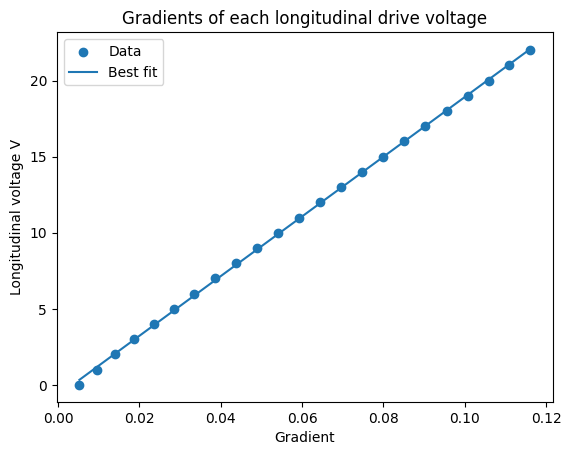

In [33]:
gradients=np.array(gradients)

p2,c2 = optimize.curve_fit(linear, gradients ,supply_list, p0=[1, 0])


plt.scatter(gradients,supply_list, label="Data")
plt.plot(gradients,linear(gradients,*p2),label="Best fit")
plt.title("Gradients of each longitudinal drive voltage")
plt.xlabel("Gradient")
plt.ylabel("Longitudinal voltage V")
plt.legend()


In [35]:
print("The gradient of the best fit is: {0:.3f}".format(p2[0]))

The gradient of the best fit is: 196.082


From this we use:
$$n_{sq}=\frac{m_2}{eR}$$
$$n_{sq}=\frac{196.082}{e \times 6949}$$


We then use:
$$\mu=\frac{1}{n_{sq}eR_{sq}}$$
$$\mu=\frac{1}{1.88 \times 10^{17} \times e \times 2316}$$


In [41]:
n_rt=p2[0]/(constants.e*6949)
print(n_rt)

1.7611808655244512e+17


In [42]:
mu_rt = 1/(n_rt * constants.e * 2316)
print(mu_rt)

0.015301961073072048


# Cryogenic

In [ ]:
mag=np.arange(0,23,1)

# Initialise empty array to read in from dictionary 
hall_list=[]
current_list=[]
supply_list=data["0"]["Power Supply Voltage"]


# Insert values of Hall Bar Voltage and current for each magnetic field voltage into an array 
for i in np.arange(0,23,1):
    x=str(i)
    hall_list.append(data[x]["Hall Bar Voltage"])
    current_list.append(data[x]["Hall Bar Current"])



B= mag_calib(mag)

params=[]
cov=[]
gradients=[]

# Find paramaters of best fit lines for each new data set
for i in range(len(mag)):
    p,c = optimize.curve_fit(linear, B, hall_list[:][i], p0=[1, 0])
    params.append(p)
    cov.append(c)
    gradients.append(p[0])


# Plot the graph
plt.figure(figsize=(12,8))

for i in range(len(mag)):
    
    plt.scatter(B,hall_list[:][i],marker="x",label="Drive Voltage {0}".format(supply_list[i]))
    plt.plot(B,linear(B,*params[i]))


plt.ylabel("Hall Voltage (v)")
plt.xlabel("Magnetic Field (T)")
plt.title("Hall voltage of a hall bar in a magnetic field at cryogenic temperature (using pyvisa)")
plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))


In [ ]:
gradients=np.array(gradients)

p2,c2 = optimize.curve_fit(linear, gradients ,supply_list, p0=[1, 0])


plt.scatter(gradients,supply_list, label="Data")
plt.plot(gradients,linear(gradients,*p2),label="Best fit")
plt.title("Gradients of each longitudinal drive voltage")
plt.xlabel("Gradient")
plt.ylabel("Longitudinal voltage V")
plt.legend()


In [ ]:
print("The gradient of the best fit is: {0:.3f}".format(p2[0]))

From this we use:
$$n_{sq}=\frac{m_2}{eR}$$
$$n_{sq}=\frac{}{e \times 472.2}$$


We then use:
$$\mu=\frac{1}{n_{sq}eR_{sq}}$$
$$\mu=\frac{1}{ \times e \times 157.4}$$


In [ ]:
n_ct=p2[0]/(constants.e*472.2)
print(n_ct)

In [ ]:
mu_ct = 1/(n_ct * constants.e * 157.4)
print(mu_ct)